<a href="https://colab.research.google.com/github/adammoss/astro_datasets/blob/main/examples/cmd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
!pip install astro-datasets --upgrade
!pip install tensorflow_datasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for astro-datasets: filename=astro_datasets-0.0.18-py3-none-any.whl size=17656 sha256=e8c45b101aabf7257917e491f4e661f2a68164d575fa8270be28d89bd00fea07
  Stored in directory: /root/.cache/pip/wheels/a9/da/58/1a9e5ca91c024570863ba1bd31a4f1feb08cd99d24d57e8782
Successfully built astro-datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 4.1 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.6.0
    Uninstalling tensorflow-datasets-4.6.0:
      Successfully uninstalled tensorflow-datasets-4.6.0


In [4]:
import tensorflow_datasets as tfds
import astro_datasets

In [5]:
ds, info = tfds.load(name='cmd', 
                     split='train', 
                     with_info=True, 
                     as_supervised=True, 
                     builder_kwargs={'simulation': 'IllustrisTNG', 'field': 'Mtot_Nbody', 
                                     'parameters': ['omegam']})

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/IllustrisTNG_Mtot_Nbody_omegam/cmd/1.0.4.incompletePI6WQ8/cmd-train.tfreco…

Dataset cmd downloaded and prepared to /root/tensorflow_datasets/IllustrisTNG_Mtot_Nbody_omegam/cmd/1.0.4. Subsequent calls will reuse this data.


In [6]:
print(info)

tfds.core.DatasetInfo(
    name='cmd',
    full_name='cmd/1.0.4',
    description="""
    The CAMELS Multifield dataset consists of 3 groups indicating the type of simulation used to create the data.IllustrisTNG are magneto-hydrodynamic simulations.SIMBA are hydrodynamic simulations.There are corresponding N-body simulations for each(magneto-)hydrodynamic simulation.
    """,
    homepage='https://camels-multifield-dataset.readthedocs.io/en/latest/index.html',
    data_path='/root/tensorflow_datasets/IllustrisTNG_Mtot_Nbody_omegam/cmd/1.0.4',
    file_format=tfrecord,
    download_size=3.66 GiB,
    dataset_size=3.66 GiB,
    features=FeaturesDict({
        'image': Tensor(shape=(256, 256, 1), dtype=tf.float32),
        'label': Tensor(shape=(1,), dtype=tf.float32),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=15000, num_shards=32>,
    },
    citation="""""",
)


In [7]:
def normalize(image, label):  
    image = tf.math.asinh(image)
    image = image - 26
    return image, label

def resize(image, label, size):
    image = tf.image.resize(image, size=[size, size])
    return image, label

In [8]:
ds = ds.map(lambda image, label: resize(image, label, 64))
ds = ds.map(normalize)

In [9]:
x = np.stack([x for x, y in ds])
print(np.mean(x), np.std(x))

0.24357145 1.151714


tf.Tensor([0.197], shape=(1,), dtype=float32)


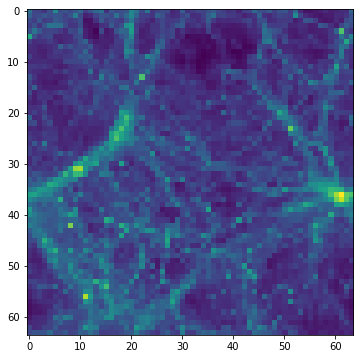

tf.Tensor([0.241], shape=(1,), dtype=float32)


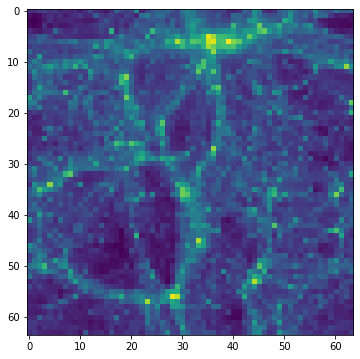

In [10]:
for d in ds.take(2):
    inputs, label = d
    print(label)
    plt.figure(figsize=(6, 6))
    plt.imshow(inputs[:,:,0])
    plt.show()